In [ ]:
# Objective: Analyse the EV category for India, and decide which EV category to enter, which states to prioritize, and competitive positioning in India.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the datasets
ev_dataset = pd.read_csv("data/EV_Dataset.csv")
ev_cat = pd.read_csv("data/ev_cat_01-24.csv")
vehicle_class_all = pd.read_csv("data/Vehicle Class - All.csv")

In [6]:
ev_dataset

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [7]:
ev_cat

,Date,FOUR WHEELER (INVALID CARRIAGE),HEAVY GOODS VEHICLE,HEAVY MOTOR VEHICLE,HEAVY PASSENGER VEHICLE,LIGHT GOODS VEHICLE,LIGHT MOTOR VEHICLE,LIGHT PASSENGER VEHICLE,MEDIUM GOODS VEHICLE,MEDIUM PASSENGER VEHICLE,MEDIUM MOTOR VEHICLE,OTHER THAN MENTIONED ABOVE,THREE WHEELER(NT),TWO WHEELER (INVALID CARRIAGE),THREE WHEELER(T),TWO WHEELER(NT),TWO WHEELER(T)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,01/12/19,0,0,0,41,18,57,49,0,10,0,197,15,1,14412,1900,333
280,01/12/20,0,0,0,10,1,505,18,0,0,0,124,17,1,10230,4564,384
281,01/12/21,2,0,1,218,16,2483,133,0,2,0,124,17,0,24115,26150,494
282,01/12/22,0,0,0,146,30,2925,915,0,15,0,673,35,0,35604,64525,138


In [8]:
vehicle_class_all

,Vehicle Class,Total Registration
0,FOUR WHEELER (INVALID CARRIAGE),"21,346"
1,HEAVY GOODS VEHICLE,"58,70,865"
2,HEAVY MOTOR VEHICLE,"1,02,965"
3,HEAVY PASSENGER VEHICLE,"8,28,189"
4,LIGHT GOODS VEHICLE,"1,02,49,591"
5,LIGHT MOTOR VEHICLE,"6,50,61,773"
6,LIGHT PASSENGER VEHICLE,"43,43,410"
7,MEDIUM GOODS VEHICLE,"8,75,789"
8,MEDIUM MOTOR VEHICLE,"1,94,600"
9,MEDIUM PASSENGER VEHICLE,"3,25,015"


In [9]:
#changing the columns names for easier comparison
ev_dataset.columns = ev_dataset.columns.str.strip().str.lower().str.replace(" ", "_")
ev_cat.columns = ev_cat.columns.str.strip().str.lower().str.replace(" ", "_")
vehicle_class_all.columns = vehicle_class_all.columns.str.strip().str.lower().str.replace(" ", "_")

In [10]:
ev_dataset.head(10)

,year,month_name,date,state,vehicle_class,vehicle_category,vehicle_type,ev_sales_quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
5,2014.0,jan,1/1/2014,Andhra Pradesh,CASH VAN,Others,Others,0.0
6,2014.0,jan,1/1/2014,Andhra Pradesh,CRANE MOUNTED VEHICLE,Others,Others,0.0
7,2014.0,jan,1/1/2014,Andhra Pradesh,EDUCATIONAL INSTITUTION BUS,Bus,Institution Bus,0.0
8,2014.0,jan,1/1/2014,Andhra Pradesh,EXCAVATOR (COMMERCIAL),Others,Others,0.0
9,2014.0,jan,1/1/2014,Andhra Pradesh,FORK LIFT,Others,Others,0.0


In [11]:
ev_cat.head(10)

,date,four_wheeler_(invalid_carriage),heavy_goods_vehicle,heavy_motor_vehicle,heavy_passenger_vehicle,light_goods_vehicle,light_motor_vehicle,light_passenger_vehicle,medium_goods_vehicle,medium_passenger_vehicle,medium_motor_vehicle,other_than_mentioned_above,three_wheeler(nt),two_wheeler_(invalid_carriage),three_wheeler(t),two_wheeler(nt),two_wheeler(t)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/01,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
2,01/01/02,0,2,1,0,266,11,5,0,0,0,0,0,0,2,11,0
3,01/01/03,0,1,2,0,35,15,1,0,0,0,1,0,0,9,18,0
4,01/01/04,0,2,0,1,14,17,1,0,0,1,2,0,0,1,21,0
5,01/01/05,0,0,0,0,10,14,1,0,0,0,0,0,0,1,38,0
6,01/01/06,0,1,0,0,9,15,1,0,0,0,2,0,0,2,62,0
7,01/01/07,0,3,3,0,7,20,0,0,0,0,0,0,0,2,119,0
8,01/01/08,0,0,2,0,6,40,3,0,0,0,2,0,0,2,518,0
9,01/01/09,0,0,0,0,2,41,0,0,0,0,1,0,0,1,965,0


In [12]:
vehicle_class_all.head(10)

,vehicle_class,total_registration
0,FOUR WHEELER (INVALID CARRIAGE),"21,346"
1,HEAVY GOODS VEHICLE,"58,70,865"
2,HEAVY MOTOR VEHICLE,"1,02,965"
3,HEAVY PASSENGER VEHICLE,"8,28,189"
4,LIGHT GOODS VEHICLE,"1,02,49,591"
5,LIGHT MOTOR VEHICLE,"6,50,61,773"
6,LIGHT PASSENGER VEHICLE,"43,43,410"
7,MEDIUM GOODS VEHICLE,"8,75,789"
8,MEDIUM MOTOR VEHICLE,"1,94,600"
9,MEDIUM PASSENGER VEHICLE,"3,25,015"


In [13]:
# replacing all the commas contained value to get a proper integer value
vehicle_class_all["total_registration"] = (
    vehicle_class_all["total_registration"].astype(str).str.replace(",", "")
)

# Then convert to numeric
vehicle_class_all["total_registration"] = pd.to_numeric(
    vehicle_class_all["total_registration"], errors="coerce"
)

In [14]:
vehicle_class_all.head(10)

,vehicle_class,total_registration
0,FOUR WHEELER (INVALID CARRIAGE),21346
1,HEAVY GOODS VEHICLE,5870865
2,HEAVY MOTOR VEHICLE,102965
3,HEAVY PASSENGER VEHICLE,828189
4,LIGHT GOODS VEHICLE,10249591
5,LIGHT MOTOR VEHICLE,65061773
6,LIGHT PASSENGER VEHICLE,4343410
7,MEDIUM GOODS VEHICLE,875789
8,MEDIUM MOTOR VEHICLE,194600
9,MEDIUM PASSENGER VEHICLE,325015


In [15]:
print(ev_dataset['vehicle_category'].unique())

['Others' 'Bus' '2-Wheelers' '4-Wheelers' '3-Wheelers']


In [16]:
print(ev_dataset['vehicle_class'].unique())

['ADAPTED VEHICLE' 'AGRICULTURAL TRACTOR' 'AMBULANCE'
 'ARTICULATED VEHICLE' 'BUS' 'CASH VAN' 'CRANE MOUNTED VEHICLE'
 'EDUCATIONAL INSTITUTION BUS' 'EXCAVATOR (COMMERCIAL)' 'FORK LIFT'
 'GOODS CARRIER' 'HARVESTER' 'MAXI CAB' 'M-CYCLE/SCOOTER' 'MOTOR CAB'
 'MOTOR CAR' 'OMNI BUS' 'PRIVATE SERVICE VEHICLE' 'RECOVERY VEHICLE'
 'THREE WHEELER (PASSENGER)' 'TRACTOR (COMMERCIAL)'
 'TRAILER (AGRICULTURAL)' 'TRAILER (COMMERCIAL)'
 'TRAILER FOR PERSONAL USE' 'VEHICLE FITTED WITH RIG'
 'CAMPER VAN / TRAILER' 'CONSTRUCTION EQUIPMENT VEHICLE (COMMERCIAL)'
 'DUMPER' 'EXCAVATOR (NT)' 'MOPED' 'THREE WHEELER (PERSONAL)'
 'THREE WHEELER (GOODS)' 'EARTH MOVING EQUIPMENT'
 'MOTOR CYCLE/SCOOTER-USED FOR HIRE' 'CONSTRUCTION EQUIPMENT VEHICLE'
 'M-CYCLE/SCOOTER-WITH SIDE CAR' 'MOBILE WORKSHOP'
 'OMNI BUS (PRIVATE USE)' 'VEHICLE FITTED WITH COMPRESSOR'
 'CAMPER VAN / TRAILER (PRIVATE USE)' 'LUXURY CAB'
 'MOTOR CYCLE/SCOOTER-SIDECAR(T)' 'ANIMAL AMBULANCE' 'BREAKDOWN VAN'
 'FIRE FIGHTING VEHICLE' 'TOW TRUCK' '

In [17]:
annual_sales = ev_dataset.groupby(['year','vehicle_category'])['ev_sales_quantity'].sum().reset_index()
annual_sales = annual_sales[annual_sales['year'] < 2024] #since there are only few 2024 datas, hence removing this part for better analysis
annual_sales

,year,vehicle_category,ev_sales_quantity
0,2014.0,2-Wheelers,1679.0
1,2014.0,3-Wheelers,12.0
2,2014.0,4-Wheelers,498.0
3,2014.0,Bus,3.0
4,2014.0,Others,200.0
5,2015.0,2-Wheelers,1447.0
6,2015.0,3-Wheelers,5440.0
7,2015.0,4-Wheelers,761.0
8,2015.0,Bus,4.0
9,2015.0,Others,153.0


In [18]:
def calculate_cagr(start, end, years):
    return ((end/start) ** (1/years)) - 1 

cagr_results = {}
start_year, end_year = annual_sales['year'].min(), annual_sales['year'].max()
years = end_year - start_year

for cat in annual_sales['vehicle_category'].unique():
    start_sales = annual_sales[(annual_sales['year']==start_year) & (annual_sales['vehicle_category']==cat)]['ev_sales_quantity'].sum()
    end_sales = annual_sales[(annual_sales['year']==end_year) & (annual_sales['vehicle_category']==cat)]['ev_sales_quantity'].sum()
    
    if start_sales > 0 and end_sales > 0:
        cagr_results[cat] = calculate_cagr(start_sales, end_sales, years)

cagr_df = pd.DataFrame(cagr_results.items(), columns=['Category','CAGR'])
print(cagr_df.sort_values(by="CAGR", ascending=False))

     Category      CAGR
1  3-Wheelers  2.316526
3         Bus  1.126364
0  2-Wheelers  0.999272
2  4-Wheelers  0.758606
4      Others  0.351467


In [19]:
market_share = annual_sales.groupby(['year','vehicle_category'])['ev_sales_quantity'].sum().reset_index()
market_share['total'] = market_share.groupby('year')['ev_sales_quantity'].transform('sum')
market_share['share'] = market_share['ev_sales_quantity'] / market_share['total'] * 100
market_share

,year,vehicle_category,ev_sales_quantity,total,share
0,2014.0,2-Wheelers,1679.0,2392.0,70.192308
1,2014.0,3-Wheelers,12.0,2392.0,0.501672
2,2014.0,4-Wheelers,498.0,2392.0,20.819398
3,2014.0,Bus,3.0,2392.0,0.125418
4,2014.0,Others,200.0,2392.0,8.361204
5,2015.0,2-Wheelers,1447.0,7805.0,18.539398
6,2015.0,3-Wheelers,5440.0,7805.0,69.698911
7,2015.0,4-Wheelers,761.0,7805.0,9.750160
8,2015.0,Bus,4.0,7805.0,0.051249
9,2015.0,Others,153.0,7805.0,1.960282


In [20]:
# calculating penetration %
vehicle_class_all["Penetration%"] = (
    vehicle_class_all["total_registration"] / vehicle_class_all["total_registration"].sum()
) * 100 

In [21]:
vehicle_class_all.head(10)

,vehicle_class,total_registration,Penetration%
0,FOUR WHEELER (INVALID CARRIAGE),21346,0.005683
1,HEAVY GOODS VEHICLE,5870865,1.563064
2,HEAVY MOTOR VEHICLE,102965,0.027413
3,HEAVY PASSENGER VEHICLE,828189,0.220498
4,LIGHT GOODS VEHICLE,10249591,2.728859
5,LIGHT MOTOR VEHICLE,65061773,17.322098
6,LIGHT PASSENGER VEHICLE,4343410,1.156393
7,MEDIUM GOODS VEHICLE,875789,0.233171
8,MEDIUM MOTOR VEHICLE,194600,0.051810
9,MEDIUM PASSENGER VEHICLE,325015,0.086532


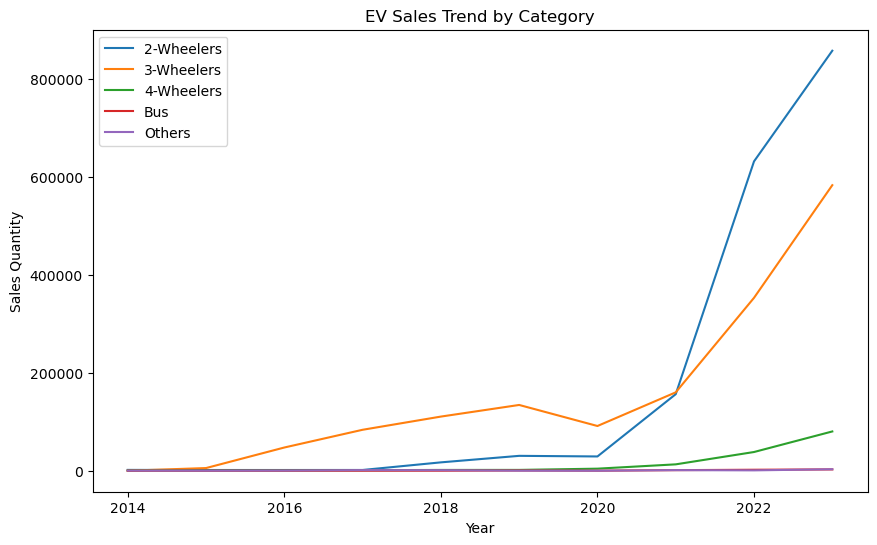

In [22]:
plt.figure(figsize=(10,6))
for cat in annual_sales['vehicle_category'].unique():
    data = annual_sales[annual_sales['vehicle_category']==cat]
    plt.plot(data['year'], data['ev_sales_quantity'], label=cat)
plt.legend()
plt.title("EV Sales Trend by Category")
plt.xlabel("Year")
plt.ylabel("Sales Quantity")
plt.show()

In [23]:
#we see that demand of 2 Wheeeler EV's have been increasing rapidly overtime

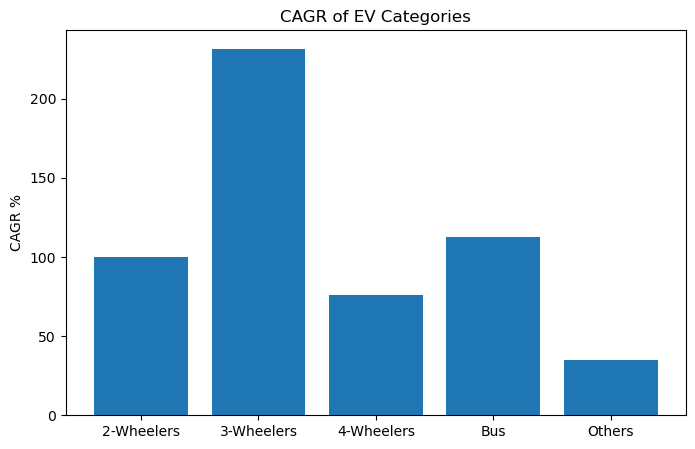

In [24]:
plt.figure(figsize=(8,5))
plt.bar(cagr_df['Category'], cagr_df['CAGR']*100)
plt.title("CAGR of EV Categories")
plt.ylabel("CAGR %")
plt.show()

In [25]:
# From the above data we see that fastest CAGR is of 3W's but mainly our company which will focus on 2W's and 4W's, 
# and LMV's have still <20% penetration → best market entry.

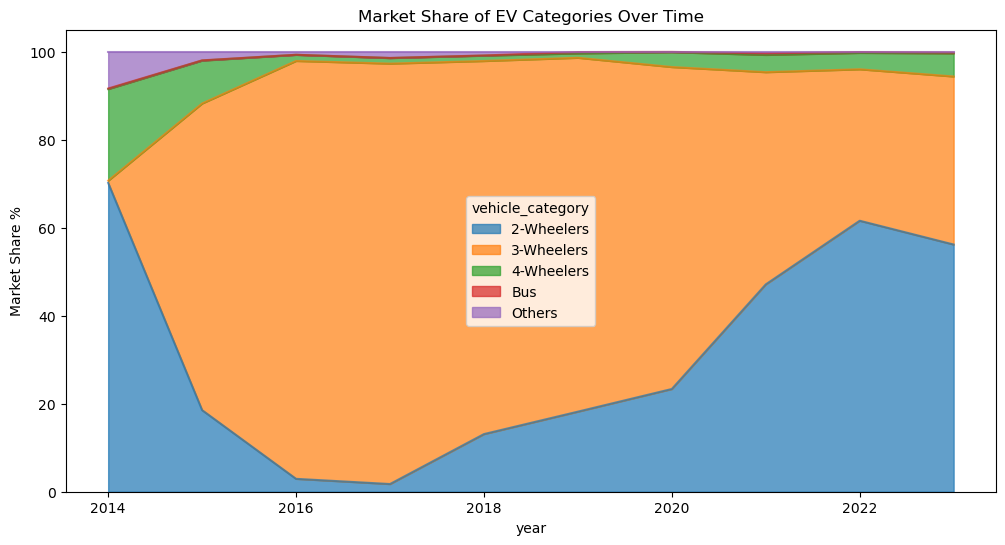

In [26]:
pivot_share = market_share.pivot(index='year', columns='vehicle_category', values='share').fillna(0)
pivot_share.plot.area(figsize=(12,6), alpha=0.7)
plt.title("Market Share of EV Categories Over Time")
plt.ylabel("Market Share %")
plt.show()

In [27]:
#State Prioritization

In [28]:
ev_charging = pd.read_csv("data/ev-charging-stations-india.csv")
ev_charging

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.980300,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.081800,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.276000,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.721800,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.721800,12.0
...,...,...,...,...,...,...,...
1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.0297934,77.045859,7.0
1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.3904593,76.959200,7.0
1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.411072,77.040546,7.0
1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.7064117,74.879203,7.0


In [29]:
ev_sales = pd.read_csv("data/EV_Dataset.csv")
ev_sales

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [30]:
ev_sales['Date'] = pd.to_datetime(ev_sales['Date'], errors='coerce')
state_sales = ev_sales.groupby('State')['EV_Sales_Quantity'].sum().reset_index()
state_sales

,State,EV_Sales_Quantity
0,Andaman & Nicobar Island,202.0
1,Andhra Pradesh,77356.0
2,Arunachal Pradesh,40.0
3,Assam,151917.0
4,Bihar,213465.0
5,Chandigarh,11453.0
6,Chhattisgarh,75275.0
7,DNH and DD,431.0
8,Delhi,268538.0
9,Goa,17382.0


In [31]:
state_chargers = ev_charging.groupby('state')['name'].count().reset_index()
state_chargers.columns = ['State', 'Charging_Stations']
state_chargers

,State,Charging_Stations
0,Andaman,1
1,Andhra Pradesh,31
2,Andhra Pradesh,1
3,Andhra pradesh,24
4,AndhraPradesh,1
5,Andra Pradesh,2
6,Assam,10
7,Bhubhaneswar,1
8,Bihar,9
9,Chandigarh,2


In [32]:
state_corrections = {
    # Union Territories
    "Andaman": "Andaman & Nicobar Islands",
    "Andaman & Nicobar Island": "Andaman & Nicobar Islands",
    "Andaman & Nicobar Islands": "Andaman & Nicobar Islands",
    "DNH and DD": "Dadra & Nagar Haveli and Daman & Diu",
    "Pondicherry": "Puducherry",
    "Puducherry": "Puducherry",
    
    # Andhra Pradesh variations
    "Andhra pradesh": "Andhra Pradesh",
    "AndhraPradesh": "Andhra Pradesh",
    "Andra Pradesh": "Andhra Pradesh",
    "Rajahmundry": "Andhra Pradesh",

    # Chhattisgarh variations
    "Chattisgarh": "Chhattisgarh",
    "chattisgarh": "Chhattisgarh",

    # Haryana variations
    "Harayana": "Haryana",
    "Hisar": "Haryana",

    # Jammu & Kashmir
    "Jammu": "Jammu and Kashmir",
    "Jammu & Kashmir": "Jammu and Kashmir",

    # Telangana variations
    "Hyderabad": "Telangana",
    "Hyderabadu00a0": "Telangana",
    "TELENGANA": "Telangana",
    "Telangana": "Telangana",

    # Tamil Nadu variations
    "Tamil Nadu": "Tamil Nadu",
    "TAMIL NADU": "Tamil Nadu",
    "TamiNadu": "Tamil Nadu",
    "TamilNadu": "Tamil Nadu",

    # Kerala variations
    "Karala": "Kerala",
    "Ernakulam": "Kerala",
    "Kochi": "Kerala",

    # Maharashtra variations
    "Maharashra": "Maharashtra",
    "Chikhali": "Maharashtra",

    # Gujarat variations
    "Limbdi": "Gujarat",

    # Odisha
    "Bhubhaneswar": "Odisha",
    "Jajpur": "Odisha",

    # Punjab variations
    "PUNJAB": "Punjab",

    # Uttarakhand variations
    "Uttarkhand": "Uttarakhand",
    "Uttrakhand": "Uttarakhand",

    # West Bengal variations
    "WestBengal": "West Bengal",
}

# Apply to both datasets
state_sales['State'] = state_sales['State'].replace(state_corrections)
ev_charging['state'] = ev_charging['state'].replace(state_corrections)

# Re-aggregate chargers after cleaning
state_chargers = ev_charging.groupby('state')['name'].count().reset_index()
state_chargers.columns = ['State', 'Charging_Stations']

In [33]:
state_summary = pd.merge(state_sales, state_chargers, on="State", how="inner")
state_summary['Charging_Stations'] = state_summary['Charging_Stations'].fillna(0)
state_summary['EVs_per_Station'] = (
    state_summary['EV_Sales_Quantity'] / (state_summary['Charging_Stations'] + 1)
).round(0).astype(int)
state_summary

,State,EV_Sales_Quantity,Charging_Stations,EVs_per_Station
0,Andaman & Nicobar Islands,202.0,1,101
1,Andhra Pradesh,77356.0,59,1289
2,Assam,151917.0,10,13811
3,Bihar,213465.0,9,21346
4,Chandigarh,11453.0,2,3818
5,Chhattisgarh,75275.0,18,3962
6,Delhi,268538.0,126,2114
7,Goa,17382.0,8,1931
8,Gujarat,176713.0,78,2237
9,Haryana,85250.0,62,1353


In [34]:
# Sort states by sales volume
top_states = state_summary.sort_values(by="EV_Sales_Quantity", ascending=False).head(10)
top_states

,State,EV_Sales_Quantity,Charging_Stations,EVs_per_Station
24,Uttar Pradesh,732074.0,87,8319
16,Maharashtra,401535.0,265,1510
13,Karnataka,315498.0,134,2337
6,Delhi,268538.0,126,2114
20,Rajasthan,228573.0,68,3313
3,Bihar,213465.0,9,21346
22,Tamil Nadu,206902.0,183,1124
8,Gujarat,176713.0,78,2237
2,Assam,151917.0,10,13811
14,Kerala,133246.0,94,1403


In [35]:
# Sort states by infra gap (high EVs per station = poor infra)
infra_gap = state_summary.sort_values(by="EVs_per_Station", ascending=False).head(10)
infra_gap

,State,EV_Sales_Quantity,Charging_Stations,EVs_per_Station
3,Bihar,213465.0,9,21346
2,Assam,151917.0,10,13811
23,Tripura,18346.0,1,9173
24,Uttar Pradesh,732074.0,87,8319
15,Madhya Pradesh,133182.0,20,6342
5,Chhattisgarh,75275.0,18,3962
4,Chandigarh,11453.0,2,3818
20,Rajasthan,228573.0,68,3313
13,Karnataka,315498.0,134,2337
25,Uttarakhand,57606.0,24,2304


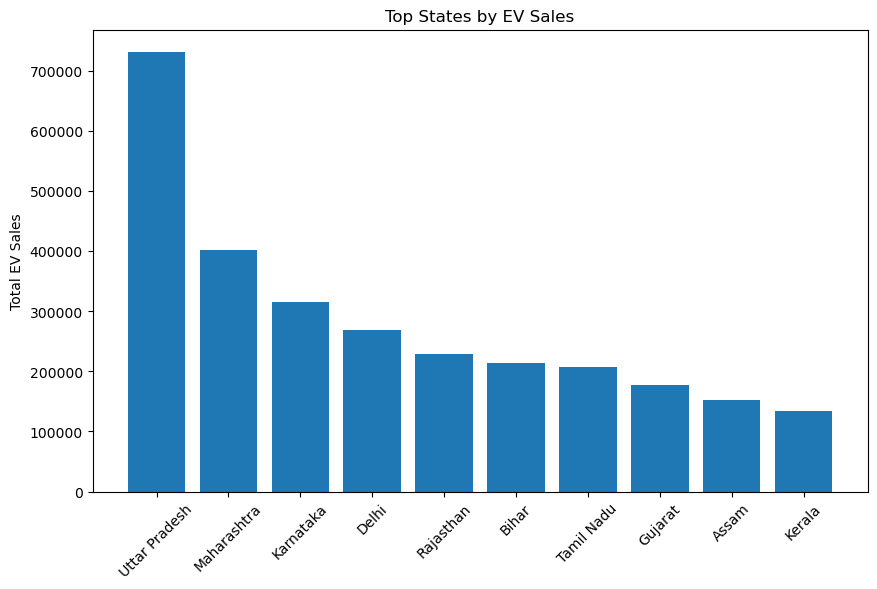

In [36]:
# Top states by sales
plt.figure(figsize=(10,6))
plt.bar(top_states['State'], top_states['EV_Sales_Quantity'])
plt.xticks(rotation=45)
plt.title("Top States by EV Sales")
plt.ylabel("Total EV Sales")
plt.show()

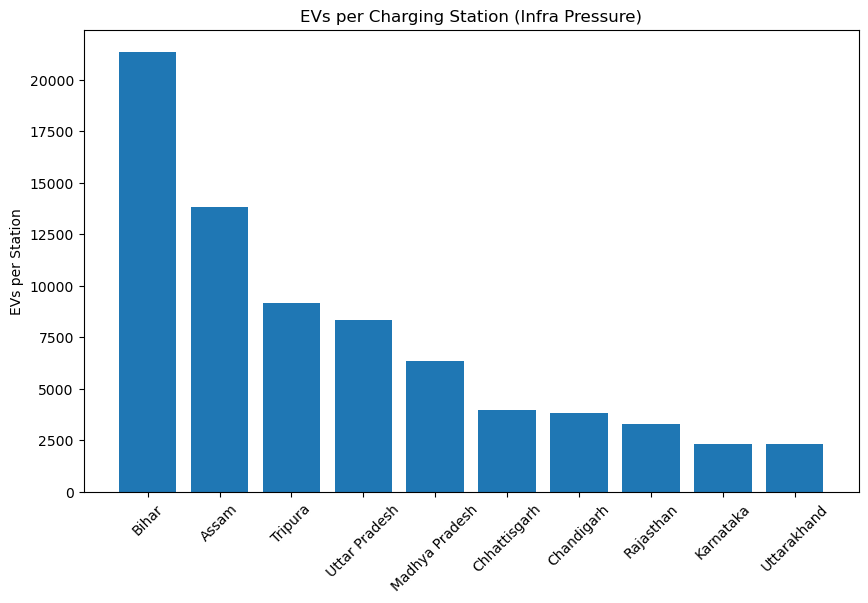

In [37]:
plt.figure(figsize=(10,6))
plt.bar(infra_gap['State'], infra_gap['EVs_per_Station'])
plt.xticks(rotation=45)
plt.title("EVs per CTCrharging Station (Infra Pressure)")
plt.ylabel("EVs per Station")
plt.show()

In [38]:
# We can see the state UP has the highest EV sales, but the Charging station per Vehicle is pretty less

'''
High Sales + Weak Infra → long-term play, infra partnerships needed (e.g., Karnataka).

Low Sales + Strong Infra → niche growth states to watch (e.g., Assam).
'''

'\nHigh Sales + Weak Infra → long-term play, infra partnerships needed (e.g., Karnataka).\n\nLow Sales + Strong Infra → niche growth states to watch (e.g., Assam).\n'

In [39]:
#competitive positioning

In [40]:
df = pd.read_csv("data/ev_sales_by_makers_and_cat_15-24.csv")
df

,Cat,Maker,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,3W,"""VOLVO GROUP INDIA PVT LTD""",0,0,31,12,0,0,0,0,0,0
1,3W,3EV INDUSTRIES PVT LTD,0,0,0,0,0,0,112,390,545,51
2,2W,3GB TECHNOLOGY PVT LTD,0,0,0,1,0,0,0,0,0,0
3,3W,3GB TECHNOLOGY PVT LTD,0,1,1,0,0,0,0,0,0,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,0,0,0,0,48,66,43,68,266,578
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),0,0,0,0,0,0,0,21,45,9
1382,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),0,0,0,0,0,0,0,0,64,6
1383,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),0,0,0,0,0,0,0,0,0,54
1384,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),0,0,0,0,0,0,0,0,0,5


In [41]:
df_melted = df.melt(id_vars=["Cat", "Maker"], 
                    var_name="Year", 
                    value_name="Sales")

df_melted["Year"] = df_melted["Year"].astype(int)
df_melted

,Cat,Maker,Year,Sales
0,3W,"""VOLVO GROUP INDIA PVT LTD""",2015,0
1,3W,3EV INDUSTRIES PVT LTD,2015,0
2,2W,3GB TECHNOLOGY PVT LTD,2015,0
3,3W,3GB TECHNOLOGY PVT LTD,2015,0
4,3W,3S INDUSTRIES PRIVATE LIMITED,2015,0
...,...,...,...,...
13855,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),2024,9
13856,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),2024,6
13857,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),2024,54
13858,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),2024,5


In [42]:
cat_totals = df_melted.groupby(["Cat", "Year"])["Sales"].sum().reset_index()
cat_totals.rename(columns={"Sales": "Category_Total"}, inplace=True)
cat_totals

,Cat,Year,Category_Total
0,2W,2015,1439
1,2W,2016,1444
2,2W,2017,1525
3,2W,2018,17075
4,2W,2019,30376
5,2W,2020,29123
6,2W,2021,156324
7,2W,2022,631393
8,2W,2023,860398
9,2W,2024,550351


In [43]:
df_melted = df_melted.merge(cat_totals, on=["Cat", "Year"])
df_melted["MarketShare"] = df_melted["Sales"] / df_melted["Category_Total"] * 100
df_melted

,Cat,Maker,Year,Sales,Category_Total,MarketShare
0,3W,"""VOLVO GROUP INDIA PVT LTD""",2015,0,5415,0.000000
1,3W,3EV INDUSTRIES PVT LTD,2015,0,5415,0.000000
2,2W,3GB TECHNOLOGY PVT LTD,2015,0,1439,0.000000
3,3W,3GB TECHNOLOGY PVT LTD,2015,0,5415,0.000000
4,3W,3S INDUSTRIES PRIVATE LIMITED,2015,0,5415,0.000000
...,...,...,...,...,...,...
13855,2W,ZHEJIANG LUYUAN (IMPORTER: DYNAM EV TECH),2024,9,550351,0.001635
13856,2W,ZHEJIANG TIANYING (IMPORTER: NEWTRON ELECTRIC),2024,6,550351,0.001090
13857,2W,ZHONGHUALONG (IMPORTER: POWORO PVT LTD),2024,54,550351,0.009812
13858,2W,ZHONGXING (IMPORTER:GREENO AUTOMOBILE),2024,5,550351,0.000909


In [44]:
top_2w_2024 = df_melted[(df_melted["Cat"]=="2W") & (df_melted["Year"]==2024)] \
                .sort_values("Sales", ascending=False).head(5)

print(top_2w_2024[["Maker", "Sales", "MarketShare"]])

                                   Maker   Sales  MarketShare
13341  OLA ELECTRIC TECHNOLOGIES PVT LTD  211273    38.388774
13704              TVS MOTOR COMPANY LTD   98516    17.900576
12622                     BAJAJ AUTO LTD   73698    13.391090
12592               ATHER ENERGY PVT LTD   58547    10.638120
12949                  HERO MOTOCORP LTD   19479     3.539378


In [52]:
print(df_melted["Cat"].unique())

['3W' '2W' 'LMV' 'MMV']


In [53]:
# Top 5 LMV (4W equivalent) makers in 2024
top_lmv_2024 = df_melted[(df_melted["Cat"] == "LMV") & (df_melted["Year"] == 2024)] \
                 .sort_values("Sales", ascending=False).head(5)

print(top_lmv_2024[["Maker", "Sales", "MarketShare"]])


                                      Maker  Sales  MarketShare
13677  TATA PASSENGER ELECTRIC MOBILITY LTD  35830    63.374427
13262                MG MOTOR INDIA PVT LTD   7229    12.786317
13224           MAHINDRA & MAHINDRA LIMITED   4305     7.614483
13674                       TATA MOTORS LTD   3076     5.440685
12664             BYD INDIA PRIVATE LIMITED   1401     2.478023


In [ ]:
'''
2W EVs → Ola + TVS dominate → avoid head-on competition unless niche (premium, rural distribution).
4W: Tata dominates → BYD & Mahindra growing.
'''

In [ ]:
# 🔑 Key Outcomes from EV Market & Infrastructure Analysis

# 1. EV Market Trends by Vehicle Category
# ---------------------------------------------
# - 2W Segment:
#     * Dominated by Ola Electric, Bajaj, TVS.
#     * Fastest adoption, especially in urban & semi-urban states.
#     * 2W EVs are the true mass-market driver.
#
# - 4W Segment (LMV):
#     * Tata Motors is the clear leader in 2024.
#     * Other notable players: MG Motors, Mahindra Electric, Hyundai.
#     * Market is concentrated with a few players → high entry barriers.
#
# Insight:
# - Clients should focus on 2W and 4W.
# - 2W = fragmented, competitive, price-sensitive.
# - 4W = concentrated, but demand clusters in Tier-1 states.

# 2. Top States by EV Adoption
# ---------------------------------------------
# Insight:
# - UP leads due to mix of urban & semi-urban demand.
# - Maharashtra, Karnataka, Delhi → strong infra + policy support.
# - Bihar & Assam show growth despite infra gaps → future opportunity.

# 3. EVs per Charging Station (Infra Pressure)
# ---------------------------------------------
# Insight:
# - Bihar, Assam, Tripura → high EV/station → underserved infra.
# - Even big states like UP & Karnataka face infra stress.
# - Infra expansion is key to support adoption.

# 🎯 Strategic Recommendations
# ---------------------------------------------
# - For 2W EVs → Focus on Bihar, Assam, Tripura (high EV/station ratio + growing demand).
# - For 4W EVs (LMV) → Strengthen in Delhi, Maharashtra, Karnataka; expand in UP & Rajasthan.
# - For Infra Providers → Invest in Bihar, Assam, Tripura to unlock EV adoption bottlenecks.